# NOTES FROM JAMES:
Study Group 01/02/20

1. Make sure you **READ, FORK, and CLONE** the official [Mod 4 Project Lesson Repo](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/end-of-module-4-project/module-4-final-project)
2. Make sure to replace the original `melt_df` function with fixed version.
3. Make sure to consult the [Project Rubric](https://github.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/blob/master/module4_project_rubric.pdf)
4. For forecasting into the future & using train_test_split:
    - First split data into train and test sets.
    - After training model, get predictions for test set.
    - Get another set of predictions built off of train+test set combined.
    
5. **If you use this notebook as a starting point, the only function you may use as-is in your personal project notebook is the `melt_data` function.**
    - **You MUST either significantly edit and document the functions we wrote together OR (ideally) write your own functions.**

___

# Mod 4 Project - Starter Notebook




This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/master/images/df_head.png">
You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/master/images/melted1.png">


There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!




# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
# !pip install -U fsds_100719
from fsds_100719.imports import *

## Project Notebook Settings
pd.set_option('display.max_columns',0)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-poster')

fsds_1007219  v0.6.2 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [37]:
## Import Your Mod 4 Functions (if you have them in a .py file)
import instructor_notebooks.functions_mod4proj as ji
# help(ji)

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/master/zillow_data.csv')#'zillow_data.csv')
df.head().style.set_caption("ORIGINAL WIDE FORMAT")

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200,335400,336500,337600,338500,339500,340400,341300,342600,344400,345700,346700,347800,349000,350400,352000,353900,356200,358800,361800,365700,370200,374700,378900,383500,388300,393300,398500,403800,409100,414600,420100,426200,432600,438600,444200,450000,455900,462100,468500,475300,482500,490200,498200,507200,516800,526300,535300,544500,553500,562400,571200,579800,588100,596300,604200,612200,620200,627700,634500,641000,647000,652700,658100,663300,668400,673400,678300,683200,688300,693300,698000,702400,706400,710200,714000,717800,721700,725700,729900,733400,735600,737200,739000,740900,742700,744400,746000,747200,748000,749000,750200,752300,755300,759200,764000,769600,775600,781900,787900,793200,798200,803100,807900,812900,818100,823100,828300,834100,839800,845600,851800,858000,864400,870700,876200,880700,884400,887600,890500,893300,895500,897300,899000,900400,902000,904400,907100,909700,911900,913000,913000,912000,909300,905300,901400,897900,895400,893600,891100,887000,881700,875900,870300,865100,859000,851500,843800,836400,830700,827300,824800,821600,818300,814600,809800,803600,795500,786900,780700,776900,774700,774200,774400,774600,775600,777800,775200,767900,764700,766100,764100,759700,754900,746200,737300,730800,729300,730200,730700,730000,730100,730100,731200,733900,735500,735400,734400,737500,737700,733700,734000,740300,744600,750500,760400,771800,780600,787900,794100,798900,802300,806100,810900,817400,826800,837900,848100,853800,856700,856600,854400,853000,856200,859700,863900,872900,883300,889500,892800,893600,891300,889900,891500,893000,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,9991

In [4]:
fs.quick_refs.ts_pandas_freq_aliases()

PANDAS TIME FREQUENCY ALIASES
[i] Documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


| Alias | Description |
    |----|-----|
    |B|business day frequency|
    |C|custom business day frequency|
    |D|calendar day frequency|
    |W|weekly frequency|
    |M|month end frequency|
    |SM|semi-month end frequency (15th and end of month)|
    |BM|business month end frequency|
    |CBM|custom business month end frequency|
    |MS|month start frequency|
    |SMS|semi-month start frequency (1st and 15th)|
    |BMS|business month start frequency|
    |CBMS|custom business month start frequency|
    |Q|quarter end frequency|
    |BQ|business quarter end frequency|
    |QS|quarter start frequency|
    |BQS|business quarter start frequency|
    |A, Y| year end frequency|
    |BA, BY |business year end frequency|
    |AS, YS |year start frequency|
    |BAS, BYS |business year start frequency|
    |BH|business hour frequency|
    |H|hourly frequency|
    |T, min |minutely frequency|
    |S|secondly frequency|
    |L, ms|milliseconds|
    |U, us |microseconds|
    |N|nanoseconds|
    

In [5]:
def melt_data(df):
    
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName', 
                                  'SizeRank'], var_name='Month', value_name='MeanValue')
    melted['Month'] = pd.to_datetime(melted['Month'], format='%Y-%m')
    melted = melted.dropna(subset=['MeanValue'])
    return melted

In [6]:
df = melt_data(df)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Month,MeanValue
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


In [7]:
def make_datetimeindex(df,col_to_make_index = 'Month',drop=False,verbose=True):

    df[col_to_make_index] = pd.to_datetime(df[col_to_make_index],errors='coerce')
    df = df.set_index('Month',drop=drop)
    if verbose:
        display(df.index)
    return df

In [8]:
df = make_datetimeindex(df)

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Month', length=3744704, freq=None)

In [9]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Month,MeanValue
Month,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


# Step 2: Preprocessing

In [10]:
df2 = df.groupby('RegionName').resample('MS').asfreq()
df2

RegionID  RegionName  ...      Month MeanValue
RegionName Month                             ...                     
1001       1996-04-01     58196        1001  ... 1996-04-01  113100.0
           1996-05-01     58196        1001  ... 1996-05-01  112800.0
           1996-06-01     58196        1001  ... 1996-06-01  112600.0
           1996-07-01     58196        1001  ... 1996-07-01  112300.0
           1996-08-01     58196        1001  ... 1996-08-01  112100.0
...                         ...         ...  ...        ...       ...
99901      2017-12-01    100478       99901  ... 2017-12-01  291900.0
           2018-01-01    100478       99901  ... 2018-01-01  294200.0
           2018-02-01    100478       99901  ... 2018-02-01  297500.0
           2018-03-01    100478       99901  ... 2018-03-01  302100.0
           2018-04-01    100478       99901  ... 2018-04-01  305100.0

[3744704 rows x 9 columns]

In [11]:
df2.isna().sum()

RegionID           0
RegionName         0
City               0
State              0
Metro         236023
CountyName         0
SizeRank           0
Month              0
MeanValue          0
dtype: int64

In [12]:
df2['Metro'].fillna('Missing',inplace=True)
df2.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
Month         0
MeanValue     0
dtype: int64

# Step 3: EDA and Visualization

In [13]:
fs.quick_refs.ts_date_str_formatting()

CODE,MEANING,EXAMPLE
%Y,Year with century as a decimal number.,2001
%y,Year without century as a zero-padded decimal number.,01
%m,Month as a zero-padded decimal number.,02
%B,Month as locale’s full name.,February
%b,Month as locale’s abbreviated name.,Feb
%d,Day of the month as a zero-padded decimal number.,03
%A,Weekday as locale’s full name.,Saturday
%a,Weekday as locale’s abbreviated name.,Sat
%H,Hour (24-hour clock) as a zero-padded decimal number.,16
%I,Hour (12-hour clock) as a zero-padded decimal number.,04


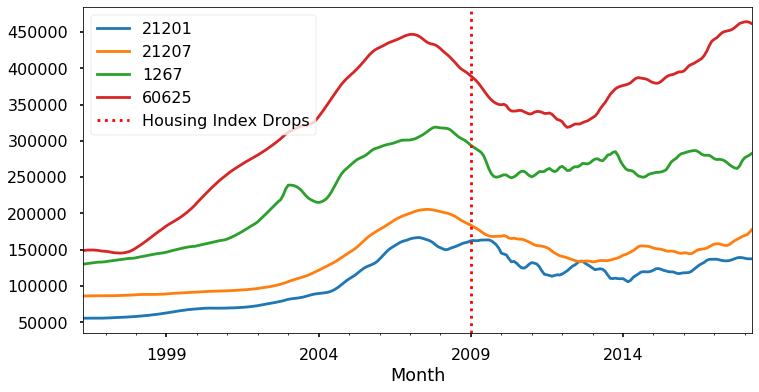

In [36]:
# ts =df2['MeanValue'].loc[21201]
def plot_ts(df2,col='MeanValue',zipcodes=[21201]):
    
    fig,ax = plt.subplots(figsize=(12,6))
    
    for zc in zipcodes:
        ts = df2[col].loc[zc]

        ts.plot(label=str(zc),ax=ax)

#     max_ = ts.loc['2004':'2010'].idxmax()
    crash = '01-2009'
#     min_ =ts.loc[crash:].idxmin()

#     ax.axvline(max_,label='Max Price',color='green',ls=':')
    ax.axvline(crash, label='Housing Index Drops',color='red',ls=':')
#     ax.axvline(min_,label=f'Min Price Post-Crash {min_}', color='black')
    ax.legend()
    return fig,ax 
fig,ax = plot_ts(df2,zipcodes=[21201,21207,1267,60625])


### MOVING FORWARD WITH 1267

In [15]:
df = df2.loc[pd.IndexSlice[:,'2014-01-01':],:].copy()
df.head()

RegionID  RegionName  ...      Month MeanValue
RegionName Month                             ...                     
1001       2014-01-01     58196        1001  ... 2014-01-01  185100.0
           2014-02-01     58196        1001  ... 2014-02-01  184800.0
           2014-03-01     58196        1001  ... 2014-03-01  184900.0
           2014-04-01     58196        1001  ... 2014-04-01  184500.0
           2014-05-01     58196        1001  ... 2014-05-01  184500.0

[5 rows x 9 columns]

In [16]:
df.reset_index(inplace=True,level=0,drop=True)
df.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Month,MeanValue
Month,,,,,,,,,
2014-01-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,2014-01-01,185100.0
2014-02-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,2014-02-01,184800.0
2014-03-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,2014-03-01,184900.0
2014-04-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,2014-04-01,184500.0
2014-05-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,2014-05-01,184500.0


In [17]:
ts =df.loc[df['RegionName']==1267]["MeanValue"].rename(1267)
# ts=ts['MeanValue']
# ts=ts.rename('1267')
ts

Month
2014-01-01    266400.0
2014-02-01    261800.0
2014-03-01    259600.0
2014-04-01    259300.0
2014-05-01    258200.0
2014-06-01    254800.0
2014-07-01    251800.0
2014-08-01    250700.0
2014-09-01    249900.0
2014-10-01    251100.0
2014-11-01    253700.0
2014-12-01    255000.0
2015-01-01    255700.0
2015-02-01    256600.0
2015-03-01    256700.0
2015-04-01    257300.0
2015-05-01    258400.0
2015-06-01    260300.0
2015-07-01    265300.0
2015-08-01    271000.0
2015-09-01    273800.0
2015-10-01    276100.0
2015-11-01    279900.0
2015-12-01    282400.0
2016-01-01    283300.0
2016-02-01    284400.0
2016-03-01    285500.0
2016-04-01    286200.0
2016-05-01    286800.0
2016-06-01    286400.0
2016-07-01    284400.0
2016-08-01    281600.0
2016-09-01    280200.0
2016-10-01    280300.0
2016-11-01    280200.0
2016-12-01    278000.0
2017-01-01    275400.0
2017-02-01    274300.0
2017-03-01    274700.0
2017-04-01    274100.0
2017-05-01    272700.0
2017-06-01    270200.0
2017-07-01    267000.0
2017-

In [18]:
ts.name

1267

In [19]:
ts = ts.resample('MS').asfreq()

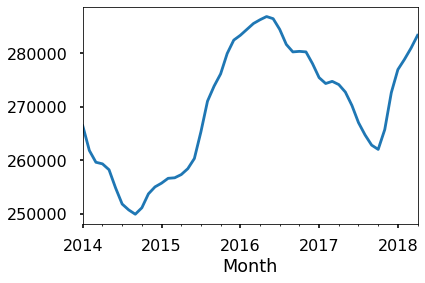

In [20]:
ts.plot()

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot,lag_plot

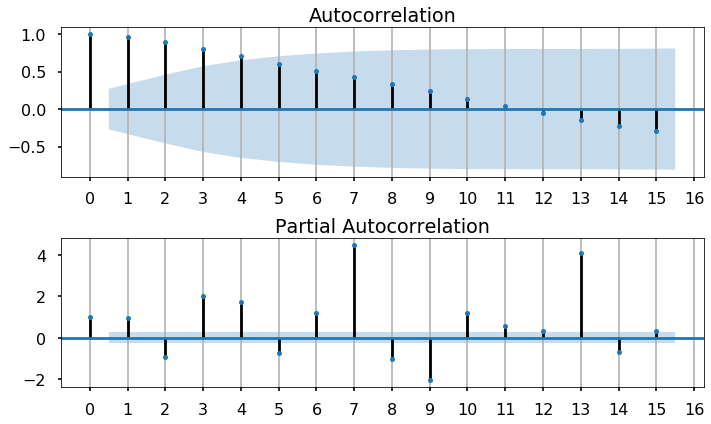

In [22]:
def plot_acf_pacf(ts, figsize=(10,6),lags=15):
    fig,ax = plt.subplots(nrows=2,figsize=figsize)
    plot_acf(ts,ax=ax[0],lags=lags)
    plot_pacf(ts, ax=ax[1],lags=lags) 
    plt.tight_layout()
    
    for a in ax:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    
plot_acf_pacf(ts)


- AR(p):
    - ACF for AR(p) would be strong until lag of p, then stagnant, then trail off. 
    - PACF for AR(p): Generally no correlation for lag values beyond p.
- MA(q):
    - ACF for MA(q) would show strong correlation up to a lag of q, the immedately delcine to minimal/no correction.
    - PACF would show strong relationship to the lag and tailing off to no correlation afterwards.
   
- Notation is generally ARMA(p,q)
- Example: ARMA(2,1) model equation
     $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$

| Param| AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |
    

Text(0.5, 1.0, 'Season Length = 365 days 00:00:00')

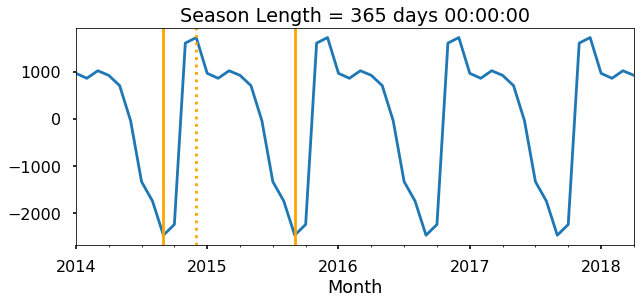

In [23]:
decomp = seasonal_decompose(ts)
ts_seas = decomp.seasonal

ax = ts_seas.plot()
fig = ax.get_figure()
fig.set_size_inches(10,4)


## Get min and max idx
min_ = ts_seas.idxmin()
max_ = ts_seas.idxmax()
min_2 = ts_seas.loc[max_:].idxmin()

ax.axvline(min_,label=min_,c='orange')
ax.axvline(max_,c='orange',ls=':')
ax.axvline(min_2,c='orange')

period = min_2 - min_
ax.set_title(f'Season Length = {period}')

# Step 5: ARIMA Modeling

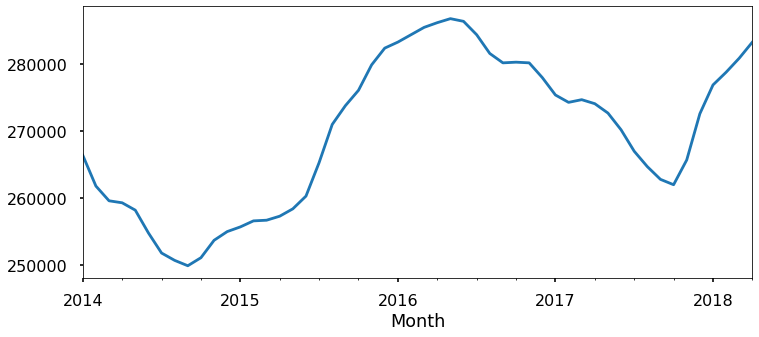

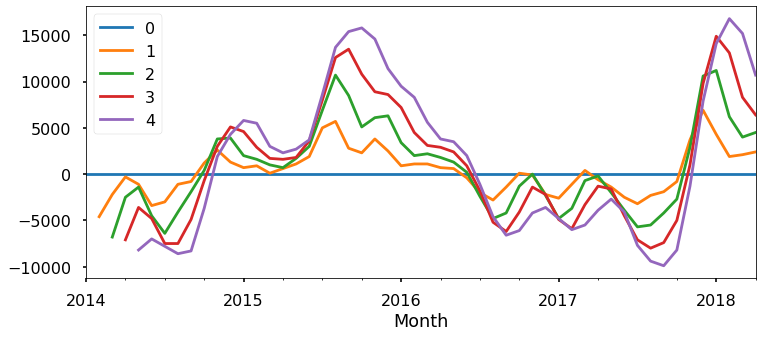

In [24]:
mpl.rcParams['figure.figsize']=(12,5)
ts.plot( )
plt.figure()
for i in range(5):
    ax = ts.diff(i).plot(label=i)
#     ax.set
ax.legend()

In [25]:
import itertools

p_range = range(0,10)
q_range = range(0,10)
d_range=range(1,3)
m_range=(0,6,12)

pdq = list(itertools.product(p_range,d_range,q_range))
PDQM = list(itertools.product(p_range,d_range,q_range,m_range))
PDQM[:10]

[(0, 1, 0, 0),
 (0, 1, 0, 6),
 (0, 1, 0, 12),
 (0, 1, 1, 0),
 (0, 1, 1, 6),
 (0, 1, 1, 12),
 (0, 1, 2, 0),
 (0, 1, 2, 6),
 (0, 1, 2, 12),
 (0, 1, 3, 0)]

In [26]:
def make_pdq_pdqm(p_range=(0,4),d_range=(0,3), 
                  q_range=(0,4),make_seasonal=True,
                  m_values=(0,12)):
    import itertools
    ps =range(p_range[0],p_range[1])
    ds =range(d_range[0],d_range[1])
    qs =range(q_range[0],q_range[1])
    
    params = {}
    params['pdq'] = list(itertools.product(ps,ds,qs))
    
    if make_seasonal:
        params['PDQm'] = list(itertools.product(ps,ds,qs,m_values))
    return params

params = make_pdq_pdqm()
params.keys()

dict_keys(['pdq', 'PDQm'])

In [27]:
# fs.ihelp(ji.get_train_test_split_index,0)
def get_train_test_split_index(ts, TEST_SIZE=0.1,min_test_ts=2):
    import math
    idx_split = math.floor(len(ts.index)*(1-TEST_SIZE))
    
    num_test_ts=len(ts.iloc[idx_split:])
    if num_test_ts<min_test_ts:
        print(f'[!] Warning: using TEST_SIZE={TEST_SIZE} produced {num_test_ts} test timestamps.')
        print("- Overriding TEST_SIZE and using min_test_ts instead.")
        idx_split = len(ts)-min_test_ts
    
    return idx_split


def train_test_split_ts(ts,test_size=0.2,min_test_ts=2):
    idx_split = get_train_test_split_index(ts,TEST_SIZE=test_size,
                                           min_test_ts=min_test_ts)
    ts_train = ts.iloc[:idx_split]
    ts_test = ts.iloc[idx_split:]
    return ts_train, ts_test

    

In [28]:
ts_train,ts_test = train_test_split_ts(ts)

len(ts_train),len(ts_test)

(41, 11)

In [29]:


def get_now(return_dt = True, return_str=True, show=False):
    import datetime as dt
    import tzlocal as tz
    now=dt.datetime.now(tz=tz.get_localzone())
    str_time =now.strftime('%m/%d/%Y - %I:%M:%S %p')
    if show:
        print(str_time)
    
    output=[]
    if return_dt:
        output.append(now)
        
    if return_str:
        output.append(str_time)
    return output[:]


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def grid_search_sarimax(ts_train,pdq=None,pdqm=None,order_dict=None,
                        verbose=False):

    from tqdm import trange
    
    if (pdq is None) & (order_dict is not None):
        pdq= order_dict['pdq']
    if (pdqm is None) & (order_dict is not None):
        pdqm= order_dict['PDQm']

#     import tqdm
#     from tqdm import trange

    start,start_str = get_now(return_dt=True, return_str=True)
    print(f'[i] STARTING GRID SEARCH @ {start_str}:')

    res = [['pdq','PDQM','AIC']]
    for i in trange((len(pdq))):
        comb = pdq[i]
        
        for combs in pdqm:
            try: 
                model = SARIMAX(ts_train, order=comb, 
                               seasonal_orde =combs,enforce_stationarity=False,
                               enforce_invertibility=False)
                
                output= model.fit()
                res.append([comb,combs,output.aic])
            except:
                if verbose:
                    print(f"[!] Error running ({comb})({combs})")
                continue
    end,end_str = get_now(return_dt=True, return_str=True)
    elapsed = end-start
    print(f"[i] GRID SEARCH FINISHED AT {end_str}")
    print(f"\tTotal Time: {elapsed} sec")

    try:
        df_res =fs.list2df(res)
        return df_res
    
    except:
        print('Error converting to df. Returning as list.')
        return res 

In [31]:
res = grid_search_sarimax(ts_train,order_dict=params)#pdq,pdqm)
res

  0%|          | 0/48 [00:00<?, ?it/s]

[i] STARTING GRID SEARCH @ 01/02/2020 - 01:45:10 PM:


100%|██████████| 48/48 [04:49<00:00,  6.04s/it]

[i] GRID SEARCH FINISHED AT 01/02/2020 - 01:50:00 PM
	Total Time: 0:04:49.766170 sec


,pdq,PDQM,AIC
0,"(0, 0, 0)","(0, 0, 0, 0)",1115.855492
1,"(0, 0, 0)","(0, 0, 0, 12)",1115.855492
2,"(0, 0, 0)","(0, 0, 1, 0)",1115.855492
3,"(0, 0, 0)","(0, 0, 1, 12)",1115.855492
4,"(0, 0, 0)","(0, 0, 2, 0)",1115.855492
...,...,...,...
4603,"(3, 2, 3)","(3, 2, 1, 12)",585.677851
4604,"(3, 2, 3)","(3, 2, 2, 0)",585.677851
4605,"(3, 2, 3)","(3, 2, 2, 12)",585.677851
4606,"(3, 2, 3)","(3, 2, 3, 0)",585.677851


# Step 6: Interpreting Results

In [33]:
top_params = res.sort_values('AIC').head(10)
display(top_params)
top_params=top_params.loc[top_params['AIC']>0]

best_params =  dict(order=top_params.iloc[0].loc['pdq'],
             seasonal_order = top_params.iloc[0].loc['PDQM']) 
# pd.DataFrame.from_dict(best_params)
best_params

,pdq,PDQM,AIC
4607,"(3, 2, 3)","(3, 2, 3, 12)",585.677851
4537,"(3, 2, 3)","(1, 0, 0, 12)",585.677851
4538,"(3, 2, 3)","(1, 0, 1, 0)",585.677851
4539,"(3, 2, 3)","(1, 0, 1, 12)",585.677851
4540,"(3, 2, 3)","(1, 0, 2, 0)",585.677851
4541,"(3, 2, 3)","(1, 0, 2, 12)",585.677851
4542,"(3, 2, 3)","(1, 0, 3, 0)",585.677851
4543,"(3, 2, 3)","(1, 0, 3, 12)",585.677851
4544,"(3, 2, 3)","(1, 1, 0, 0)",585.677851
4545,"(3, 2, 3)","(1, 1, 0, 12)",585.677851


{'order': (3, 2, 3), 'seasonal_order': (3, 2, 3, 12)}

In [35]:
len(ts_train)

41

In [34]:
model_output = SARIMAX(ts_train,**best_params).fit()

ValueError: maxlag should be < nobs